In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('df_ant1_zero.csv')
df2 = pd.read_csv('df_ant2_zero.csv')
df3 = pd.read_csv('df_ant3_zero.csv')

In [3]:
X12 = (df1['I'] + 1j*df1['Q']) * (df2['I'] - 1j*df2['Q'])
X23 = (df2['I'] + 1j*df2['Q']) * (df3['I'] - 1j*df3['Q'])
X13 = (df1['I'] + 1j*df1['Q']) * (df3['I'] - 1j*df3['Q'])

In [4]:
d = {'channel': df1['Channel'],'x12': X12, 'x23': X23, 'x13': X13, 'idx1':df1['sample_idx'], 'idx2':df2['sample_idx'], 'idx3':df3['sample_idx']}
data = pd.DataFrame(data=d)
data['phi12'] = np.angle(X12)* 180/(2*np.pi)
data['phi23'] = np.angle(X23)* 180/(2*np.pi)
data['phi13'] = np.angle(X13)* 180/(2*np.pi)
data['amp12'] = np.abs(X12)
data['amp23'] = np.abs(X23)
data['amp13'] = np.abs(X13)
data.to_csv('phi_amp30.csv', index = False)

In [5]:
from filterpy.kalman import KalmanFilter

In [6]:
from filterpy.common import Q_discrete_white_noise

In [7]:
f = KalmanFilter (dim_x=2, dim_z=1)

In [8]:
f.x = np.array([[0.],   # theta
                [0.]])  #omega
f.F = np.array([[1.,0],
                [1.,1.]])
f.H = np.array([[1,0]])
f.P *= 1000.
# f.R = 5 # scalar
f.R = np.array([[1.]]) # dimentional
f.Q = 1

In [9]:
z12 = data['phi12']
results = []
for i in range(len(z12)):
    f.predict()
    f.update(z12[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
data['phi12_kf'] = res_arr[:,0]  

In [10]:
z23 = data['phi23']
results = []
for i in range(len(z23)):
    f.predict()
    f.update(z23[i])
    results.append(f.x)
res_arr = np.asarray(results)
data['phi23_kf'] = res_arr[:,0]

In [11]:
z13 = data['phi13']
results = []
for i in range(len(z13)):
    f.predict()
    f.update(z13[i])
    results.append(f.x)
res_arr = np.asarray(results)
data['phi13_kf'] = res_arr[:,0] 

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

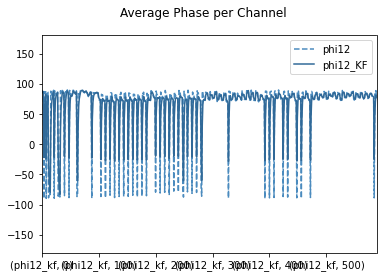

In [12]:
data.unstack(level=0)[['phi12']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
data.unstack(level=0)[['phi12_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

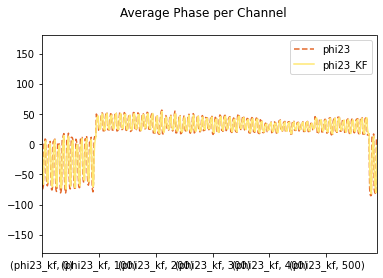

In [13]:
data.unstack(level=0)[['phi23']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color= '#E4682A', linestyle='dashed', label='phi23', legend=True)
data.unstack(level=0)[['phi23_kf']].plot(subplots=True, title="Average Phase per Channel",xlim=[0,588],  ylim=[-180,+180], color= '#FFE873',  label='phi23_KF', legend=True)


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

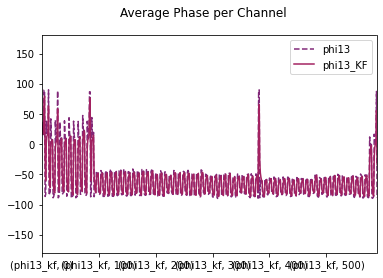

In [14]:
data.unstack(level=0)[['phi13']].plot(subplots=True, title="Average Phase per Channel",xlim=[0,588], ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
data.unstack(level=0)[['phi13_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588],ylim=[-180,+180], color= '#A22160', label='phi13_KF', legend=True)


In [15]:
data[0:96]
np.average(data['idx3'][0:96])

329.5

In [16]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], 
                       "ave_phi12": np.average(data['phi12'][i-96:i]),
                       "ave_phi23": np.average(data['phi23'][i-96:i]), 
                       "ave_phi13": np.average(data['phi13'][i-96:i]),
                       "teta12_kf": np.average(data['phi12_kf'][i-96:i]),
                       "teta23_kf": np.average(data['phi23_kf'][i-96:i]),
                       "teta13_kf": np.average(data['phi13_kf'][i-96:i]), 
                       "idx1": np.average(data['idx1'][i-96:i]),
                       "idx2": np.average(data['idx2'][i-96:i]),
                       "idx3": np.average(data['idx3'][i-96:i])})
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel=  average_phi_perchannel.drop([0])
average_phi_perchannel


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,channel,ave_phi12,ave_phi23,ave_phi13,teta12_kf,teta23_kf,teta13_kf,idx1,idx2,idx3
1,12,56.961157,-29.484397,-21.273239,56.963264,-29.092645,-20.597809,321.5,313.5,329.5
2,24,58.290749,36.367944,-64.716307,58.369408,36.276511,-64.704864,321.5,313.5,329.5
3,25,57.714644,32.470228,-65.440128,57.712918,32.476269,-65.438036,321.5,313.5,329.5
4,13,77.152934,32.582308,-64.639758,77.154083,32.617744,-64.978148,321.5,313.5,329.5
5,36,65.877540,28.540860,-70.581600,65.867281,28.493858,-70.261662,321.5,313.5,329.5
...,...,...,...,...,...,...,...,...,...,...
65,0,54.140377,29.026696,-66.832926,54.131039,29.052621,-66.817190,321.5,313.5,329.5
66,24,78.346447,-28.684256,-40.337809,78.298369,-28.668431,-40.393364,321.5,313.5,329.5
67,23,55.047179,31.604533,-65.223289,55.110633,31.560045,-65.183243,321.5,313.5,329.5
68,11,78.861933,40.587534,-58.675533,78.843689,40.603346,-58.674891,321.5,313.5,329.5


array([<AxesSubplot:>], dtype=object)

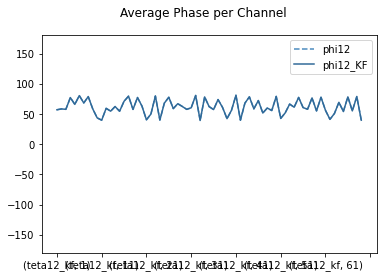

In [17]:
average_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
average_phi_perchannel.unstack(level=0)[['teta12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)

array([<AxesSubplot:>], dtype=object)

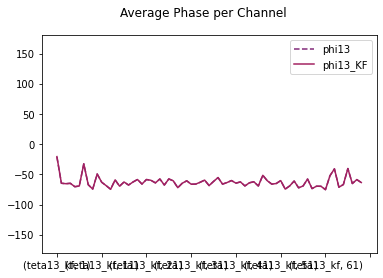

In [18]:
average_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
average_phi_perchannel.unstack(level=0)[['teta13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='phi13_KF', legend=True)


array([<AxesSubplot:>], dtype=object)

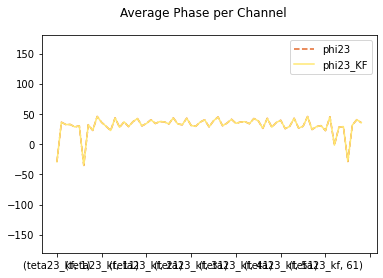

In [19]:
average_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#E4682A', linestyle='dashed', label='phi23', legend=True)
average_phi_perchannel.unstack(level=0)[['teta23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873',  label='phi23_KF', legend=True)

In [20]:
print(np.average(average_phi_perchannel['ave_phi12']), np.average(average_phi_perchannel['ave_phi23']), np.average(average_phi_perchannel['ave_phi13']))
print(np.average(average_phi_perchannel['teta12_kf']), np.average(average_phi_perchannel['teta23_kf']), np.average(average_phi_perchannel['teta13_kf']))

61.89845813449446 31.003732579095235 -62.77715711249725
61.90015335398296 31.00766540433929 -62.7671295876987


In [21]:
sdata = data[0:96]
len(sdata)
f

KalmanFilter object
dim_x = 2
dim_z = 1
dim_u = 0
x = [[-8.33139905e+01  2.02743441e+05]].T
P = [[6.18033989e-01 1.00000000e+00]
     [1.00000000e+00 2.11599990e+04]]
x_prior = [[-8.22827588e+01  2.02745110e+05]].T
P_prior = [[1.61803399e+00 2.61803399e+00]
           [2.61803399e+00 2.11626170e+04]]
x_post = [[-8.33139905e+01  2.02743441e+05]].T
P_post = [[6.18033989e-01 1.00000000e+00]
          [1.00000000e+00 2.11599990e+04]]
F = [[1. 0.]
     [1. 1.]]
Q = 1
R = [[1.]]
H = [[1 0]]
K = [[0.61803399 1.        ]].T
y = [[-1.66856805]]
S = [[2.61803399]]
SI = [[0.38196601]]
M = [[0.]]
B = None
z = [[-83.95132682]]
log-likelihood = -1.9318698392057922
likelihood = 0.14487704827409698
mahalanobis = 1.0312317692366895
alpha = 1.0
inv = <function inv at 0x000001B0CF9A5040>

In [22]:
np.abs(sdata['x12'])

0     8125.866415
1     8356.570828
2     8544.702277
3     8400.673366
4      878.000569
         ...     
91    8241.407950
92     810.570787
93     850.150575
94     816.241386
95     913.898244
Name: x12, Length: 96, dtype: float64

In [23]:
f = KalmanFilter (dim_x=2, dim_z=1)

In [24]:
f.x = np.array([[0.],   # theta
                [0.]])  #omega
f.F = np.array([[1.,0],
                [1.,1.]])
f.H = np.array([[0,1]])
f.P *= 1000.
# f.R = 5 # scalar
f.R = np.array([[1.]]) # dimentional
f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=0.13)

In [25]:
z12 = sdata['phi12']
results = []
for i in range(len(z12)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x12'][i]))
    f.predict()
    f.update(z12[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi12_kf'] = res_arr[:,0] 
sdata['omega12_kf'] = res_arr[:,1] 

<ipython-input-25-ee95c7d582f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['phi12_kf'] = res_arr[:,0]
<ipython-input-25-ee95c7d582f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['omega12_kf'] = res_arr[:,1]


In [26]:
z23 = sdata['phi23']
results = []
for i in range(len(z23)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x23'][i]))
    f.predict()
    f.update(z23[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi23_kf'] = res_arr[:,0] 
sdata['omega23_kf'] = res_arr[:,1] 

<ipython-input-26-85438e1246be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['phi23_kf'] = res_arr[:,0]
<ipython-input-26-85438e1246be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['omega23_kf'] = res_arr[:,1]


In [27]:
z13 = sdata['phi13']
results = []
for i in range(len(z13)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x13'][i]))
    f.predict()
    f.update(z13[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi13_kf'] = res_arr[:,0] 
sdata['omega13_kf'] = res_arr[:,1] 

<ipython-input-27-1672525ed378>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['phi13_kf'] = res_arr[:,0]
<ipython-input-27-1672525ed378>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['omega13_kf'] = res_arr[:,1]


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

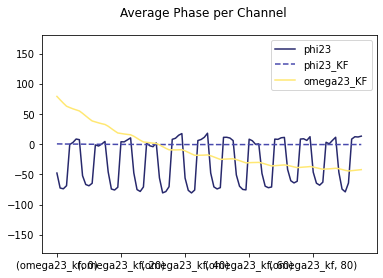

In [28]:
sdata.unstack(level=0)[['phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [29]:
np.average(sdata['phi23']), np.average(sdata['phi23_kf']), np.average(sdata['omega23_kf'])

(-29.48439660708037, -0.4877621842741851, -8.465154464655084)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

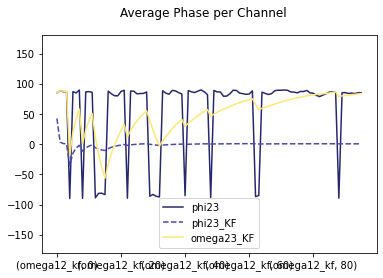

In [30]:
sdata.unstack(level=0)[['phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [31]:
np.average(sdata['phi12']), np.average(sdata['phi12_kf']), np.average(sdata['omega12_kf'])

(56.96115718107819, -0.7119698150793531, 49.947806021586196)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

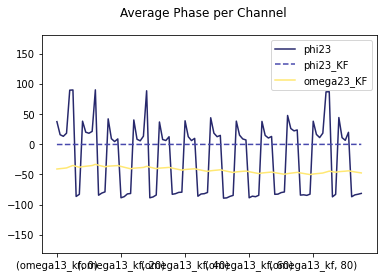

In [32]:
sdata.unstack(level=0)[['phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [33]:
np.average(sdata['phi13']), np.average(sdata['phi13_kf']), np.average(sdata['omega13_kf'])

(-21.273239426002178, -0.4296469648779659, -42.70585350705699)